# lg3 combined data visualize demo

Plot `Power` for train/val/test across three buildings (sources).

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

PROCESSED_ROOT = os.path.abspath(os.path.join('..', 'data', 'processed_sources'))
SOURCES = ['elec1_f2', 'ohsung_f2', 'snu']

# Column to visualize
POWER_COL = 'Power'


In [3]:
def load_split(source, split):
    path = os.path.join(PROCESSED_ROOT, source, f'lg3_{split}.csv')
    df = pd.read_csv(path, parse_dates=[0], index_col=0)
    if POWER_COL not in df.columns:
        raise ValueError(f'{POWER_COL} column not found in {path}')
    return df[[POWER_COL]]

splits = ['train', 'val', 'test']
data = {src: {sp: load_split(src, sp) for sp in splits} for src in SOURCES}

for src in SOURCES:
    for sp in splits:
        df = data[src][sp]
        print(f'{src} {sp} range:', df.index.min(), '->', df.index.max(), 'len:', len(df))


elec1_f2 train range: 2025-08-01 13:25:00 -> 2025-09-10 19:55:00 len: 11020
elec1_f2 val range: 2025-09-10 20:00:00 -> 2025-09-20 01:20:00 len: 1574
elec1_f2 test range: 2025-09-20 01:25:00 -> 2025-09-30 23:55:00 len: 3149
ohsung_f2 train range: 2025-07-01 00:00:00 -> 2025-09-03 14:20:00 len: 17734
ohsung_f2 val range: 2025-09-03 14:25:00 -> 2025-09-12 09:35:00 len: 2534
ohsung_f2 test range: 2025-09-12 09:40:00 -> 2025-09-29 23:55:00 len: 5067
snu train range: 2025-07-01 00:00:00 -> 2025-09-02 16:45:00 len: 18337
snu val range: 2025-09-02 16:50:00 -> 2025-09-11 19:05:00 len: 2619
snu test range: 2025-09-11 19:10:00 -> 2025-09-29 23:55:00 len: 5240


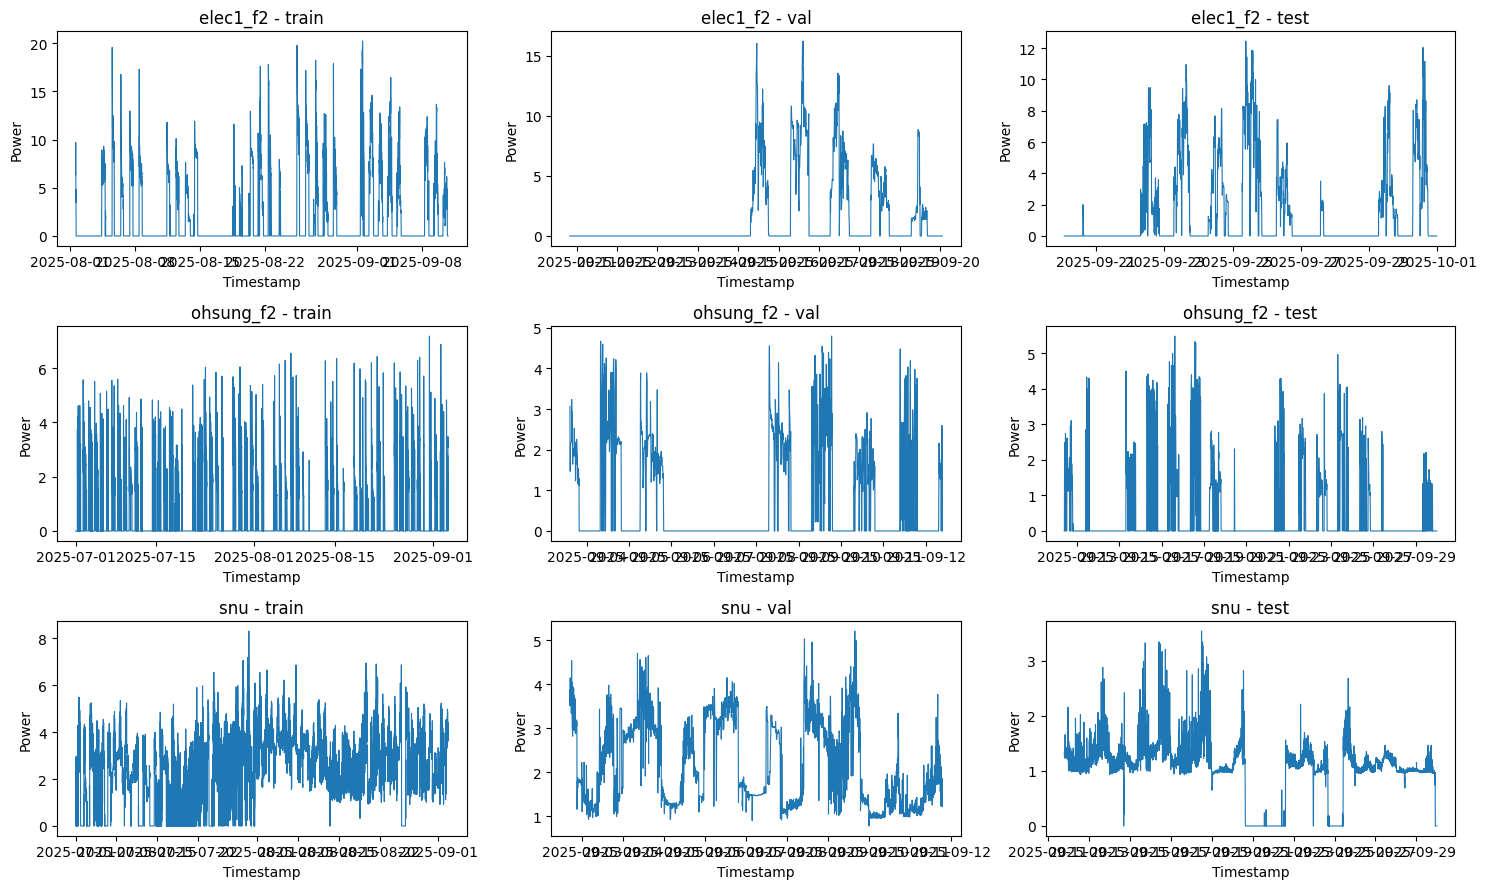

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9), sharex=False)

for i, src in enumerate(SOURCES):
    for j, sp in enumerate(splits):
        ax = axes[i, j]
        df = data[src][sp]
        ax.plot(df.index, df[POWER_COL], linewidth=0.8)
        ax.set_title(f'{src} - {sp}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel(POWER_COL)

plt.tight_layout()
plt.show()
